# **Import Library**

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_colwidth', None)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score,recall_score


from imblearn.over_sampling import SMOTE


# **Load and Clean Dataset**

In [55]:
def load_data(path_csv):
	df = pd.read_csv(path_csv)
	df.drop_duplicates(inplace=True) # drop duplicate value
	df.dropna(inplace=True) # drop missing value
	df.info()
	return df

In [56]:
path = "fraud_oracle.csv"
df = load_data(path)
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


# **Feature Definitions**

- **Month**: Month of the insurance claim.
- **WeekOfMonth**: Week of the month of the claim.
- **DayOfWeek**: Day of the week of the claim.
- **Make**: Vehicle manufacturer.
- **AccidentArea**: Accident area (urban/rural).
- **DayOfWeekClaimed**: Day of the week the claim was processed.
- **MonthClaimed**: Month the claim was processed.
- **WeekOfMonthClaimed**: Week of the month the claim was processed.
- **Sex**: Policyholder's gender.
- **MaritalStatus**: Policyholder's marital status.
- **Age**: Policyholder's age.
- **Fault**: Policyholder at fault (yes/no).
- **PolicyType**: Type of insurance policy.
- **VehicleCategory**: Vehicle category (e.g., sedan, SUV).
- **VehiclePrice**: Price of the vehicle.
- **FraudFound_P**: Fraud detected (yes/no).
- **PolicyNumber**: Insurance policy identifier.
- **RepNumber**: Insurance representative identifier.
- **Deductible**: Out-of-pocket amount before insurance coverage.
- **DriverRating**: Driver's rating.
- **Days_Policy_Accident**: Days from policy issue to accident.
- **Days_Policy_Claim**: Days from policy issue to claim.
- **PastNumberOfClaims**: Previous claims by the policyholder.
- **AgeOfVehicle**: Age of the vehicle.
- **AgeOfPolicyHolder**: Age of the policyholder.
- **PoliceReportFiled**: Police report filed (yes/no).
- **WitnessPresent**: Witness present (yes/no).
- **AgentType**: Type of insurance agent (internal/external).
- **NumberOfSuppliments**: Number of supplementary documents/claims.
- **AddressChange_Claim**: Address change at the time of claim (yes/no).
- **NumberOfCars**: Number of cars insured.
- **Year**: Year of the claim.
- **BasePolicy**: Base policy type (e.g., Liability, Collision, All Perils).

# **Exploratory Data Analysis**

## Characteristic of Dataset

In [57]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


- "PolicyNumber" is merely an identification number. Let's drop It
- The minimum value of "Age" is 0. It totally doesn't make sense. Let's drop value 0

In [58]:
# Summarize the unique of dataset
def summarize(df):
    
    summary = pd.DataFrame()
    
    # Data Type
    summary['Data Type'] = df.dtypes
    # N Unique
    summary['N Unique'] = df.nunique()
    # Unique
    summary['Unique'] = df.apply(lambda x: x.unique().tolist())
    
    return summary

In [59]:
X = summarize(df)
X

,Data Type,N Unique,Unique
Month,object,12,"[Dec, Jan, Oct, Jun, Feb, Nov, Apr, Mar, Aug, Jul, May, Sep]"
WeekOfMonth,int64,5,"[5, 3, 2, 4, 1]"
DayOfWeek,object,7,"[Wednesday, Friday, Saturday, Monday, Tuesday, Sunday, Thursday]"
Make,object,19,"[Honda, Toyota, Ford, Mazda, Chevrolet, Pontiac, Accura, Dodge, Mercury, Jaguar, Nisson, VW, Saab, Saturn, Porche, BMW, Mecedes, Ferrari, Lexus]"
AccidentArea,object,2,"[Urban, Rural]"
DayOfWeekClaimed,object,8,"[Tuesday, Monday, Thursday, Friday, Wednesday, Saturday, Sunday, 0]"
MonthClaimed,object,13,"[Jan, Nov, Jul, Feb, Mar, Dec, Apr, Aug, May, Jun, Sep, Oct, 0]"
WeekOfMonthClaimed,int64,5,"[1, 4, 2, 3, 5]"
Sex,object,2,"[Female, Male]"
MaritalStatus,object,4,"[Single, Married, Widow, Divorced]"


In [60]:
X[X["N Unique"] < 3]


,Data Type,N Unique,Unique
AccidentArea,object,2,"[Urban, Rural]"
Sex,object,2,"[Female, Male]"
Fault,object,2,"[Policy Holder, Third Party]"
FraudFound_P,int64,2,"[0, 1]"
PoliceReportFiled,object,2,"[No, Yes]"
WitnessPresent,object,2,"[No, Yes]"
AgentType,object,2,"[External, Internal]"


- "Sex", "PoliceReportFiled",... ,"WitnessPresent" are actually Boolen Types. Should be converted to 0 or 1.

## Target Variable Balance

In [61]:
target_count = df['FraudFound_P'].value_counts().reset_index()
target_count.columns = ['FraudFound_P', 'Count']
target_count

,FraudFound_P,Count
0,0,14497
1,1,923


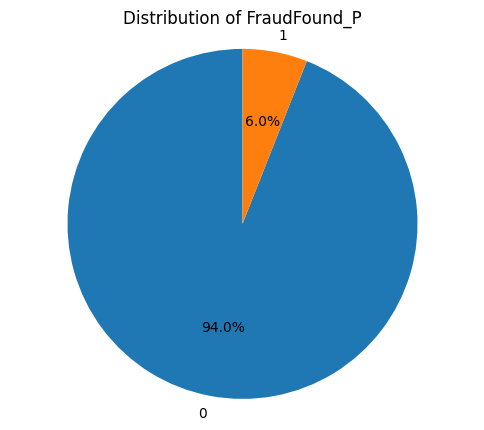

In [62]:
# pie chart
plt.figure(figsize=(6, 5))
plt.pie(target_count['Count'], labels=target_count['FraudFound_P'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of FraudFound_P')
plt.axis('equal')

plt.show()

The Target Variable "Fraud_Found_P" is highly imbalanced.

## Fraud Detection by Feature

In [63]:
def fraud_by_feature(feature, df, figsize=(8, 6)):
    """
    Generate a bar chart showing the percentage of fraud cases by the given feature using Matplotlib.

    Parameters:
        feature (str): The column name to analyze.
        df (DataFrame): The input DataFrame.
        figsize (tuple): Size of the figure.

    Returns:
        None: Displays a bar chart.
    """
    # Calculate total counts for the feature
    total_counts = df[feature].value_counts()
    
    # Filter rows where FraudFound_P == 1
    df_fraud = df[df['FraudFound_P'] == 1]
    
    # Calculate fraud counts for the feature
    fraud_counts = df_fraud[feature].value_counts()
    
    # Calculate fraud percentages
    fraud_percentages = (fraud_counts / total_counts * 100).fillna(0).sort_index()
    
    # Bar Chart
    plt.figure(figsize=figsize)
    plt.bar(fraud_percentages.index, fraud_percentages.values)
    
    plt.title(f'Fraud Detection by {feature} (%)')
    plt.xlabel(feature)
    plt.ylabel('Fraud Percentage')
    
    plt.tight_layout()
    plt.show()
    
def histogram_plot(feature, df):
    """
    Plots a histogram for the specified feature from the DataFrame.

    Parameters:
        df: The DataFrame containing the data.
        feature: The column name to visualize.

    Returns:
        None
    """
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=30, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

def box_plot(feature, df):
    """
    Plots a box plot for the specified feature from the DataFrame.

    Parameters:
        df: The DataFrame containing the data.
        feature: The column name to visualize.

    Returns:
        None
    """
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[feature], vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red'))
    plt.title(f"Box Plot of {feature}")
    plt.xlabel(feature)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()


### by Sex

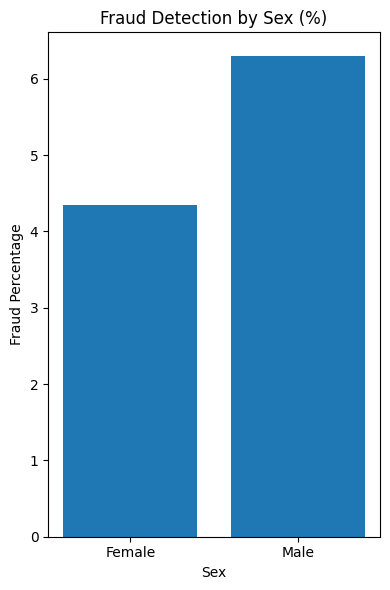

In [64]:
fraud_by_feature('Sex', df, figsize=(4,6))

- males are significantly more likely to be involved in detected fraud cases compared to females

### by Age

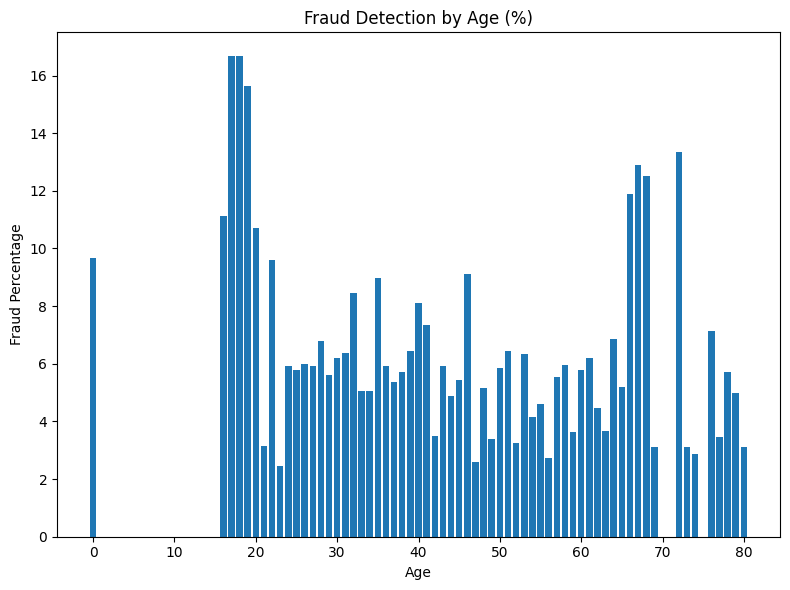

In [65]:
fraud_by_feature('Age', df)

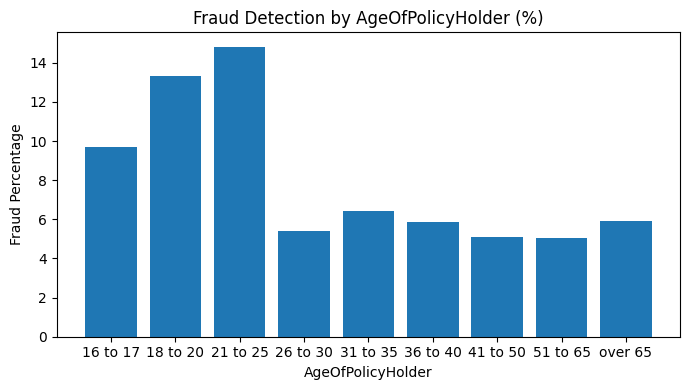

In [66]:
fraud_by_feature('AgeOfPolicyHolder', df, figsize=(7,4))

- Fraud is most frequently detected among teenagers and retired seniors
- the 31 - 40 age group exhibits a high fraud rate in "Age of Policy Holder" feature.

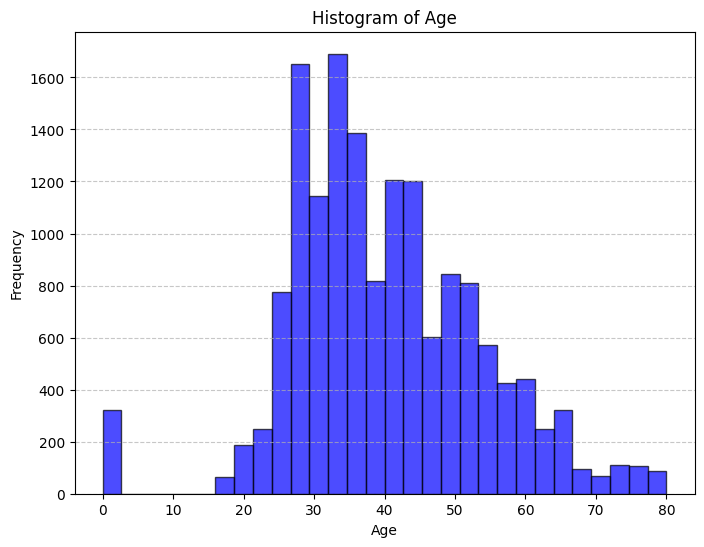

In [67]:
histogram_plot('Age', df)

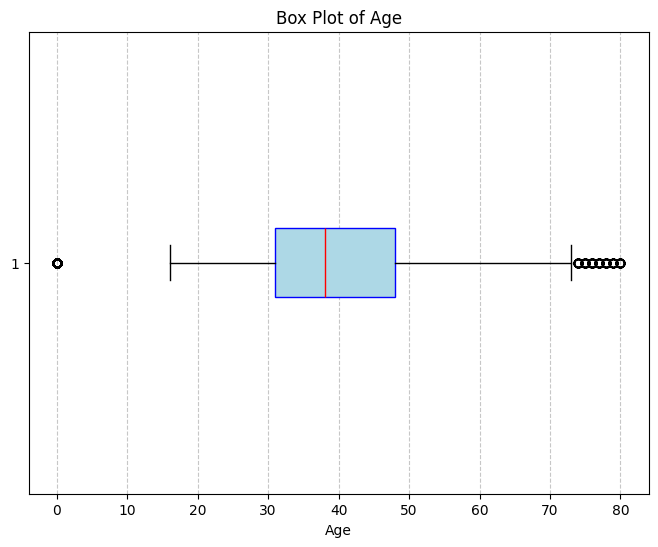

In [68]:
box_plot_fig = box_plot('Age', df)

- I decided to handle age = 0 in this feature and outlier values

### by Vehicle

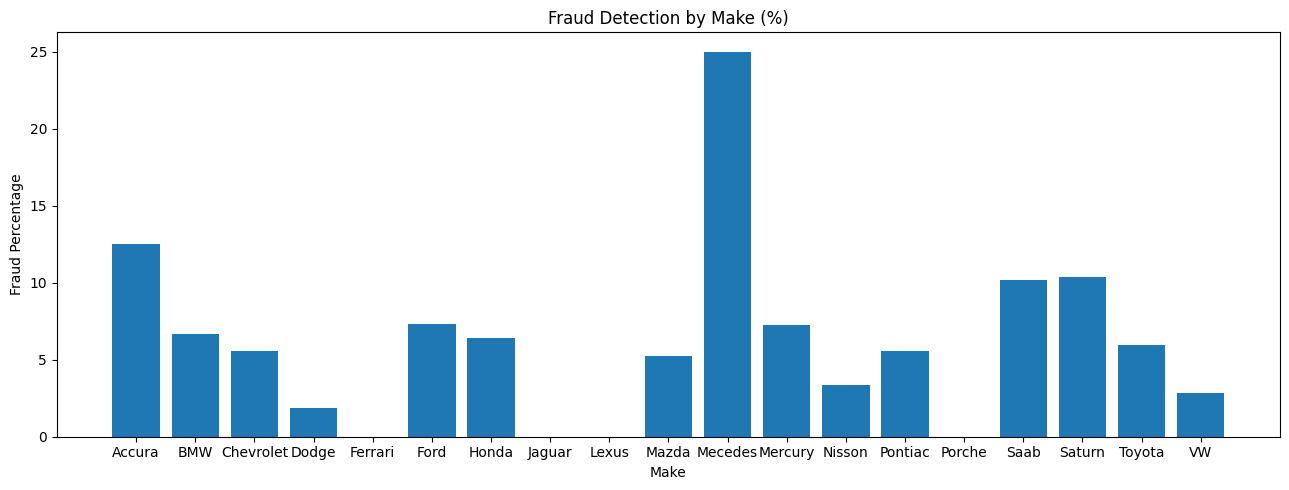

In [69]:
fraud_by_feature('Make', df, figsize=(13,5))

- Mercedes owners were more likely to be involved in fraud, with a rate nearly double that of the next highest group, Accura owners. 
- On the other hand, Porsche, Lexus, Jaguar, and Ferrari owners were never reported for fraud; all four of these vehicles are expensive.

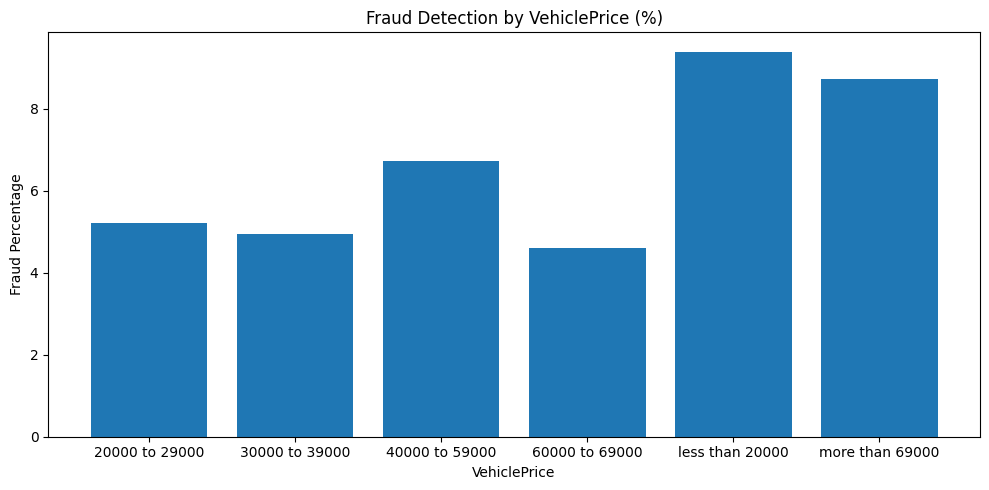

In [70]:
fraud_by_feature('VehiclePrice', df, figsize=(10,5))

- Fraud cases were most frequently detected in the most expensive or cheapest vehicles.

- The above results show that I decided to divide into 2 categories:

    - the highest fraud rates: ('40000 to 59000', '40000 to 59000','more than 69000') 
    - the lowest fraud rate    : ('20000 to 29000', '30000 to 39000', '60000 to 69000')

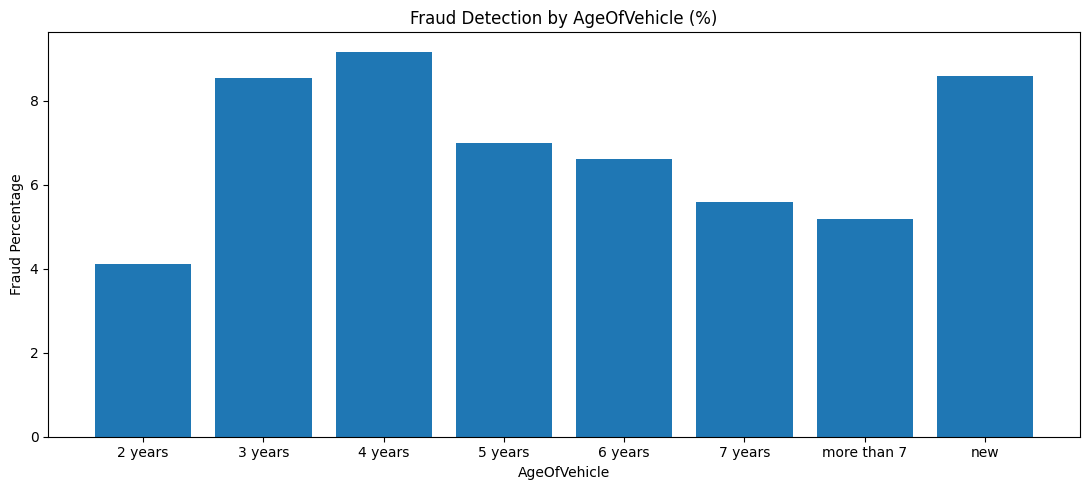

In [71]:
fraud_by_feature('AgeOfVehicle', df, figsize=(11,5))

- The “Age of Vehicle” feature can actually be reclassified into 3 categories: 
    - Highest Fraud : ('3 years', '4 years', 'new')
    - Medium Fraud  : ('5 years', '6 years')
    - Low Fraud     : ('2 years', '7 years', 'more than 7')

### by Policy

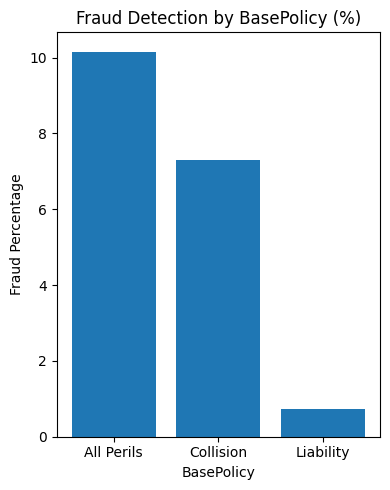

In [72]:
fraud_by_feature('BasePolicy', df, figsize=(4,5))

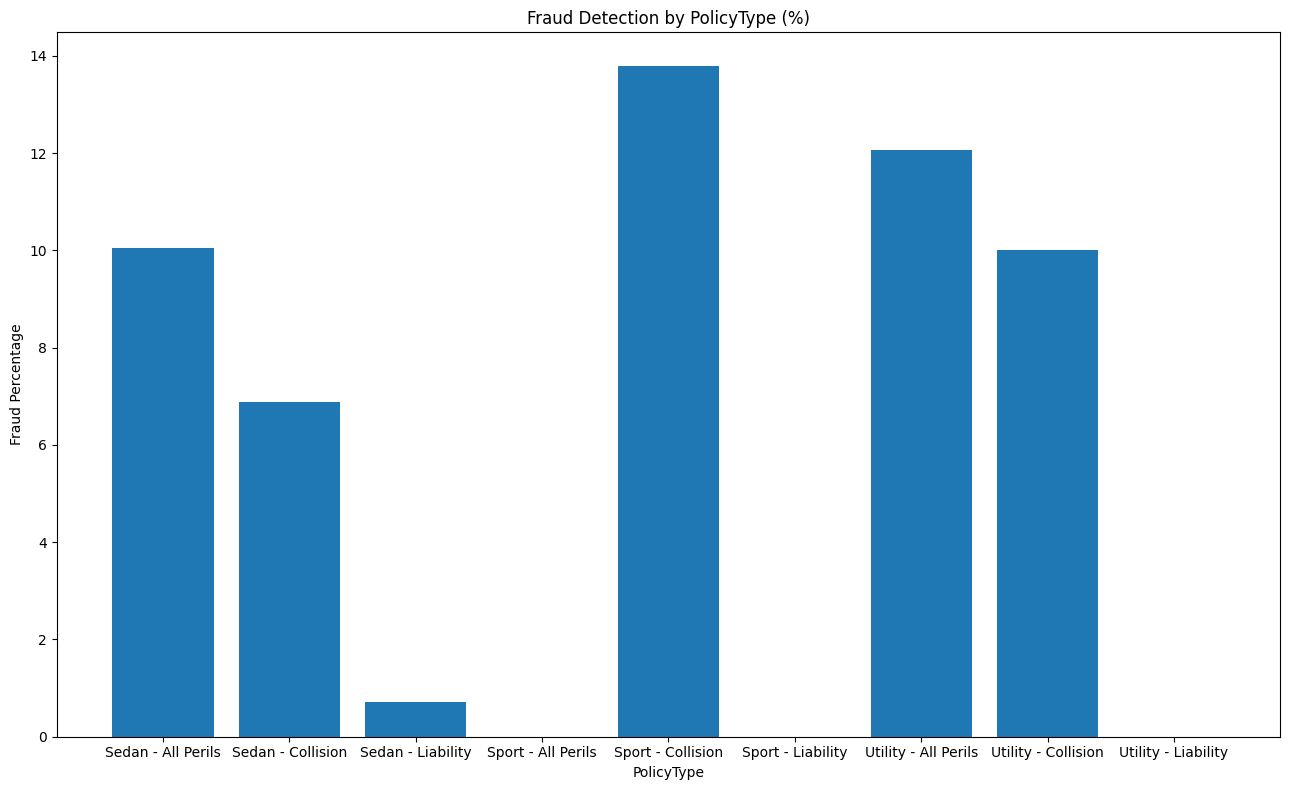

In [73]:
fraud_by_feature('PolicyType', df, figsize=(13,8))

- Fraud cases were detected most frequently under “All Risks”. For specific policy types, “Sports-Collection” had the highest fraud detection rate.

### by Month

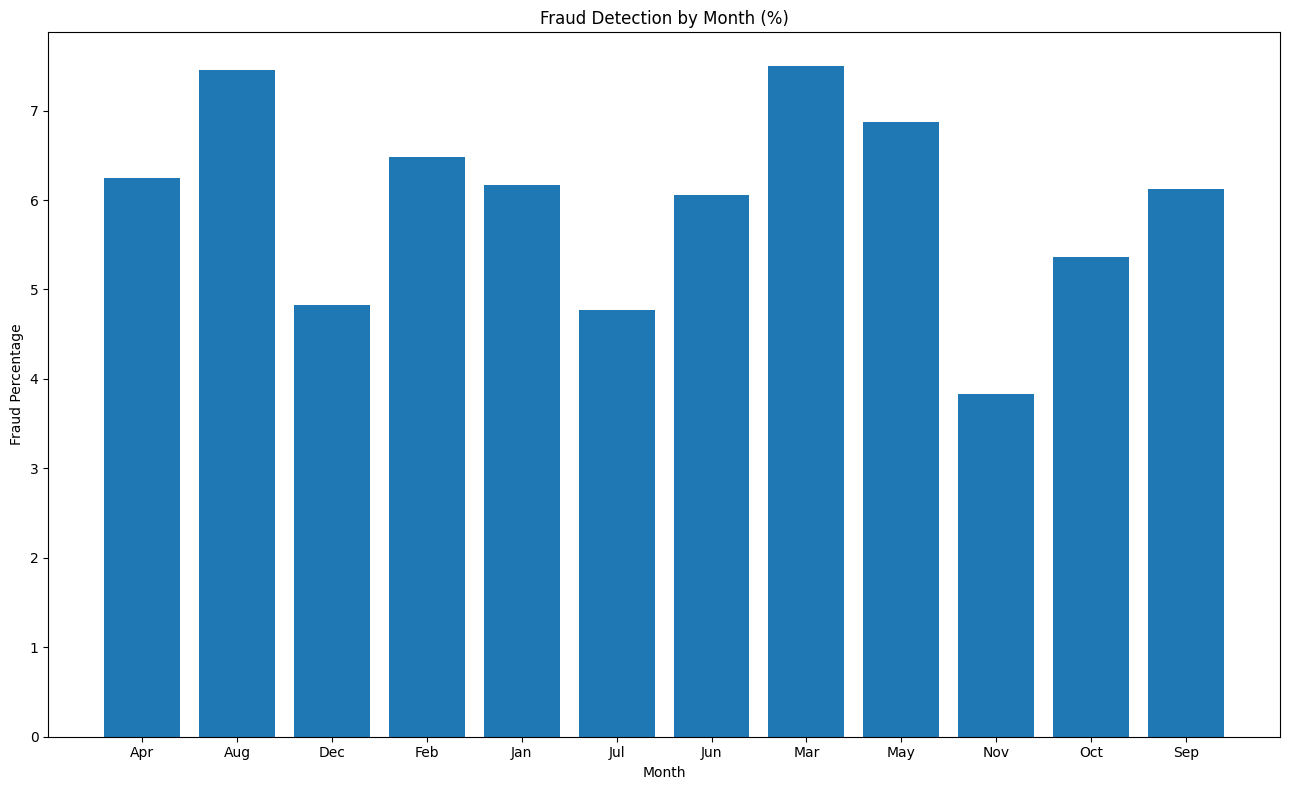

In [74]:
fraud_by_feature('Month', df, figsize=(13,8))

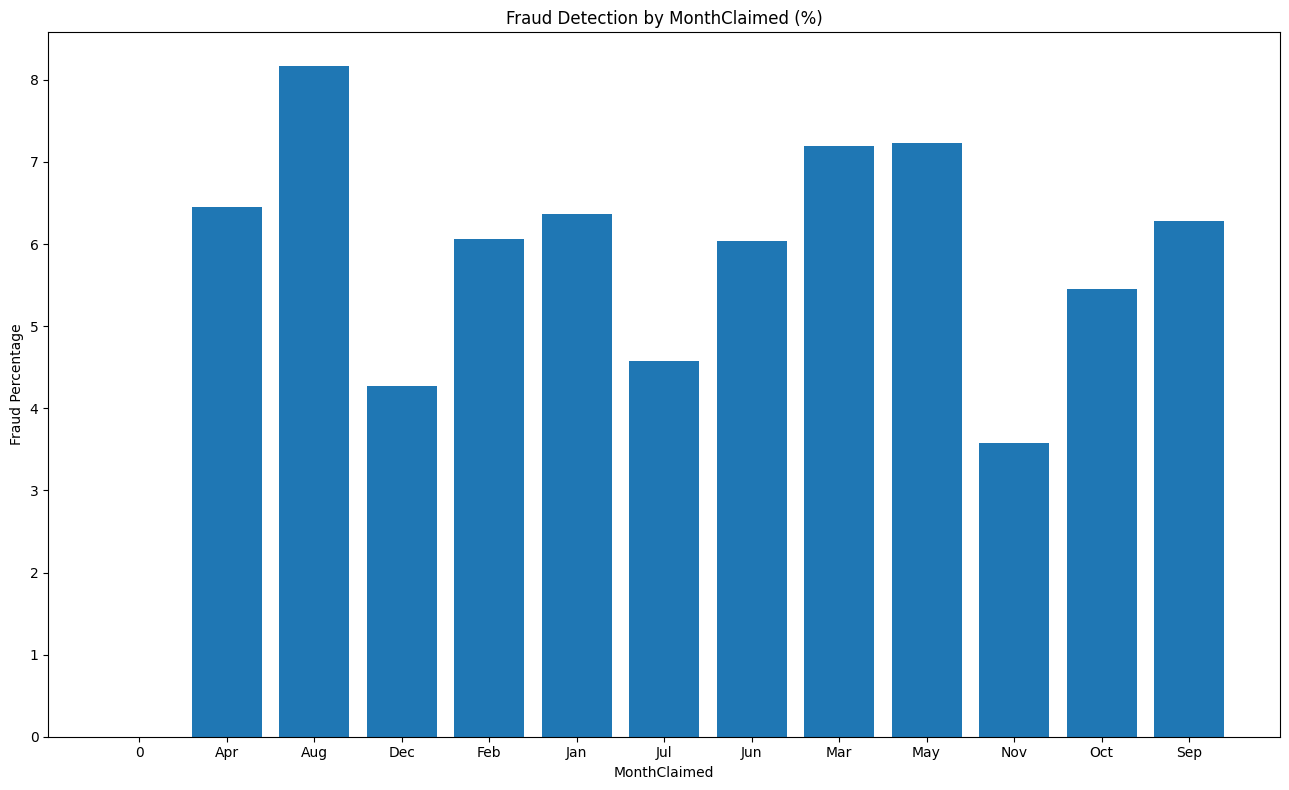

In [75]:
fraud_by_feature('MonthClaimed', df, figsize=(13,8))

- Overall, both are similar and not too different, so you don't need both.

# **Data Preprocessing**

In [76]:
df_pre = df.copy()

## Data Transformation

### Binary Variable

- AccidentArea, Sex, Fault, PoliceReportFiled, WitnessPresent, AgentType

These features have only two unique values.
Therefore, I applied Label Encoding to map them to 0 and 1.

In [77]:
binary_columns = [col for col in df_pre.columns if df_pre[col].nunique() < 3 and col != 'FraudFound_P']
binary_columns

['AccidentArea',
 'Sex',
 'Fault',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType']

In [78]:
def binary_variable(feature, df):
    
    encoder = LabelEncoder()
    df_copy = df.copy()
    for i  in feature:
        df_copy[i] = encoder.fit_transform(df_copy[i])
        print('Mapping: ', dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
    
    return df_copy


In [79]:
df_pre = binary_variable(binary_columns,df_pre)

Mapping:  {'Rural': np.int64(0), 'Urban': np.int64(1)}
Mapping:  {'Female': np.int64(0), 'Male': np.int64(1)}
Mapping:  {'Policy Holder': np.int64(0), 'Third Party': np.int64(1)}
Mapping:  {'No': np.int64(0), 'Yes': np.int64(1)}
Mapping:  {'No': np.int64(0), 'Yes': np.int64(1)}
Mapping:  {'External': np.int64(0), 'Internal': np.int64(1)}


### Encoding Categorical Variables
- Based on the results of Exploratory Data Analysis

In [80]:
def encoding_feature(feature_select, df, mapping):

    df_copy = df.copy()
    df_copy[feature_select] = df_copy[feature_select].map(mapping)
    return df_copy


In [81]:
feature_select = ['VehiclePrice', 'AgeOfVehicle', 'BasePolicy']
for col in feature_select:
    print(f"{col}: {df_pre[col].unique()}")

VehiclePrice: ['more than 69000' '20000 to 29000' '30000 to 39000' 'less than 20000'
 '40000 to 59000' '60000 to 69000']
AgeOfVehicle: ['3 years' '6 years' '7 years' 'more than 7' '5 years' 'new' '4 years'
 '2 years']
BasePolicy: ['Liability' 'Collision' 'All Perils']


In [82]:
vehicleprice_mapping = {'more than 69000': 1, '20000 to 29000': 0,  '30000 to 39000': 0, 'less than 20000': 1, '40000 to 59000': 1, '60000 to 69000': 0}
ageofvehicle_mapping = {'3 years': 2, '6 years': 1, '7 years': 0, 'more than 7': 0, '5 years': 1, 'new': 2, '4 years': 2, '2 years':0}
basepolicy_mapping   = {'Liability': 0, 'Collision': 1, 'All Perils': 2}

In [83]:
df_pre = encoding_feature('VehiclePrice', df_pre, vehicleprice_mapping)
df_pre = encoding_feature('AgeOfVehicle', df_pre, ageofvehicle_mapping)
df_pre = encoding_feature('BasePolicy', df_pre, basepolicy_mapping)
df_pre.head(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,1,Tuesday,Jan,1,0,Single,...,2,26 to 30,0,0,0,none,1 year,3 to 4,1994,0
1,Jan,3,Wednesday,Honda,1,Monday,Jan,4,1,Single,...,1,31 to 35,1,0,0,none,no change,1 vehicle,1994,1
2,Oct,5,Friday,Honda,1,Thursday,Nov,2,1,Married,...,0,41 to 50,0,0,0,none,no change,1 vehicle,1994,1
3,Jun,2,Saturday,Toyota,0,Friday,Jul,1,1,Married,...,0,51 to 65,1,0,0,more than 5,no change,1 vehicle,1994,0
4,Jan,5,Monday,Honda,1,Tuesday,Feb,2,0,Single,...,1,31 to 35,0,0,0,none,no change,1 vehicle,1994,1


### Data Reduction
- Drop "Month" because It similar feature "MonthClaimed"
- And drop other features related to "Date"

In [84]:
useless_columns = ['Month', 'WeekOfMonth', 'DayOfWeek', 'DayOfWeekClaimed', 'WeekOfMonthClaimed', 'PolicyNumber']
df_pre_v1 = df_pre.drop(columns=useless_columns, axis=1)

In [85]:
df_pre_v1.shape

(15420, 27)

### One-hot Encoding

- normalize objects

In [86]:
feature_obj = df_pre_v1.select_dtypes(include=['object']).columns
print(f"{feature_obj} ,\n {len(feature_obj)}")

Index(['Make', 'MonthClaimed', 'MaritalStatus', 'PolicyType',
       'VehicleCategory', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfPolicyHolder', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars'],
      dtype='object') ,
 12


In [87]:
df_pre_v2 = pd.get_dummies(df_pre_v1,feature_obj)
df_pre_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 99 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   AccidentArea                        15420 non-null  int64
 1   Sex                                 15420 non-null  int64
 2   Age                                 15420 non-null  int64
 3   Fault                               15420 non-null  int64
 4   VehiclePrice                        15420 non-null  int64
 5   FraudFound_P                        15420 non-null  int64
 6   RepNumber                           15420 non-null  int64
 7   Deductible                          15420 non-null  int64
 8   DriverRating                        15420 non-null  int64
 9   AgeOfVehicle                        15420 non-null  int64
 10  PoliceReportFiled                   15420 non-null  int64
 11  WitnessPresent                      15420 non-null  int64
 12  Agen

- Now, all features dtype are int or bool

### Data Reduction

In [88]:
OneHotEncoded_columns = [col for col in df_pre_v2.columns if '_' in col]
OneHotEncoded_columns.remove("FraudFound_P")
print(f"{OneHotEncoded_columns},\n {len(OneHotEncoded_columns)}")

['Make_Accura', 'Make_BMW', 'Make_Chevrolet', 'Make_Dodge', 'Make_Ferrari', 'Make_Ford', 'Make_Honda', 'Make_Jaguar', 'Make_Lexus', 'Make_Mazda', 'Make_Mecedes', 'Make_Mercury', 'Make_Nisson', 'Make_Pontiac', 'Make_Porche', 'Make_Saab', 'Make_Saturn', 'Make_Toyota', 'Make_VW', 'MonthClaimed_0', 'MonthClaimed_Apr', 'MonthClaimed_Aug', 'MonthClaimed_Dec', 'MonthClaimed_Feb', 'MonthClaimed_Jan', 'MonthClaimed_Jul', 'MonthClaimed_Jun', 'MonthClaimed_Mar', 'MonthClaimed_May', 'MonthClaimed_Nov', 'MonthClaimed_Oct', 'MonthClaimed_Sep', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Widow', 'PolicyType_Sedan - All Perils', 'PolicyType_Sedan - Collision', 'PolicyType_Sedan - Liability', 'PolicyType_Sport - All Perils', 'PolicyType_Sport - Collision', 'PolicyType_Sport - Liability', 'PolicyType_Utility - All Perils', 'PolicyType_Utility - Collision', 'PolicyType_Utility - Liability', 'VehicleCategory_Sedan', 'VehicleCategory_Sport', 'VehicleCategory_Ut

In [89]:
const_feature = []

for i in OneHotEncoded_columns:
    if df_pre_v2[i].sum() <= 5:
        const_feature.append(i)

len(const_feature)

9

In [90]:
df_pre_v2.drop(columns=const_feature, axis=1, inplace=True)
df_pre_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 90 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   AccidentArea                       15420 non-null  int64
 1   Sex                                15420 non-null  int64
 2   Age                                15420 non-null  int64
 3   Fault                              15420 non-null  int64
 4   VehiclePrice                       15420 non-null  int64
 5   FraudFound_P                       15420 non-null  int64
 6   RepNumber                          15420 non-null  int64
 7   Deductible                         15420 non-null  int64
 8   DriverRating                       15420 non-null  int64
 9   AgeOfVehicle                       15420 non-null  int64
 10  PoliceReportFiled                  15420 non-null  int64
 11  WitnessPresent                     15420 non-null  int64
 12  AgentType         

### Outlier
- Now, I decided to handle the 0 and oulier values ​​of Age, the reason being that Age is the only value that the feature is continuous.

In [91]:
def remove_outliers_iqr(feature, df):
    """
    Removes outliers from a DataFrame column using the IQR method.
    
    Args:
        feature (str): Name of the column (feature) to clean.
        df (pd.DataFrame): DataFrame containing the data.
    
    Returns:
        cleaned_df (pd.DataFrame): A new DataFrame without the outliers.
    """
    # Calculate the first and third quartiles
    Q1 = df[feature].quantile(0.25)  # First quartile (lower bound)
    Q3 = df[feature].quantile(0.75)  # Third quartile (upper bound)
    
    # Compute the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Create a mask to identify rows where the feature is within the bounds
    mask = (df[feature] >= lower_bound) & (df[feature] <= upper_bound)
    
    # Return a new DataFrame with outliers removed
    cleaned_df = df[mask].reset_index(drop=True)
    
    return cleaned_df

In [92]:
df_pre_v3 = df_pre_v2[df_pre_v2['Age'] != 0].reset_index(drop=True)
df_pre_v3 = remove_outliers_iqr('Age', df_pre_v3)

In [93]:
df_pre_v3['Age'].describe()

count    14984.000000
mean        40.407902
std         11.897656
min         16.000000
25%         31.000000
50%         38.000000
75%         48.000000
max         76.000000
Name: Age, dtype: float64

# **SMOTE Oversampling**
- In this part, I decided to use SMOTE to handle imbalance.

In [94]:
# Train - Test Split
X = df_pre_v3.drop(columns="FraudFound_P")
y = df_pre_v3["FraudFound_P"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Shape Train X:{X_train.shape}\nShape Test X: {X_test.shape} \nShape Train y:{y_train.shape}\nShape Test y: {y_test.shape} ")

Shape Train X:(11987, 89)
Shape Test X: (2997, 89) 
Shape Train y:(11987,)
Shape Test y: (2997,) 


In [95]:
smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print("Before SMOTE: ", X_train.shape, y_train.shape)
print("After Smote: ", X_train_over.shape, y_train_over.shape)

print("After SMOTE Label Distribution: ", pd.Series(y_train_over).value_counts())

Before SMOTE:  (11987, 89) (11987,)
After Smote:  (22534, 89) (22534,)
After SMOTE Label Distribution:  FraudFound_P
0    11267
1    11267
Name: count, dtype: int64


In [96]:
df_pre_v4 = pd.concat([X_train_over, y_train_over], axis=1)
df_pre_v4.shape

(22534, 90)

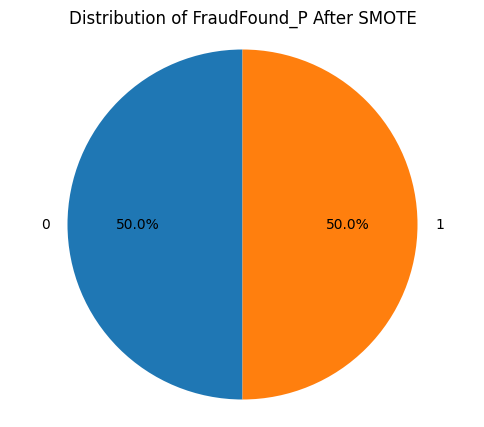

In [97]:
target_SMOTE = df_pre_v4['FraudFound_P'].value_counts().reset_index()
target_SMOTE.columns = ['FraudFound_P', 'Count']
target_SMOTE

# pie chart
plt.figure(figsize=(6, 5))
plt.pie(target_SMOTE['Count'], labels=target_SMOTE['FraudFound_P'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of FraudFound_P After SMOTE')
plt.axis('equal')

plt.show()

# Modeling

## Train & Test Split

In [98]:
Feature = df_pre_v4.drop(columns="FraudFound_P")
Target = df_pre_v4["FraudFound_P"]

X_train, X_test, y_train, y_test = train_test_split(Feature, Target, test_size=0.2, random_state=42)

## Select Model
- LogisticRegression
- GradientBoostingClassifier
- ExtraTreesClassifier
- KNeighborsClassifier
- SVC
- AdaBoostClassifier

In [99]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'GradientBoosting': GradientBoostingClassifier(),
    'ExtraTrees': ExtraTreesClassifier(class_weight='balanced'),
    'KNeighbors': KNeighborsClassifier(),
    'SVC': SVC(),
    'AdaBoost': AdaBoostClassifier()
}


## Training and Evaluation

In [106]:
# Training and Evaluation
for name, model in models.items():
    print(f"Evaluating {name}...")
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate performance
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print("-" * 50)

Evaluating LogisticRegression...


c:\Users\nguye\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2336
           1       0.99      0.94      0.96      2171

    accuracy                           0.97      4507
   macro avg       0.97      0.97      0.97      4507
weighted avg       0.97      0.97      0.97      4507

Accuracy: 0.9665
F1 Score: 0.9644
Precision: 0.9879
Recall: 0.9420
--------------------------------------------------
Evaluating GradientBoosting...
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2336
           1       0.99      0.94      0.96      2171

    accuracy                           0.97      4507
   macro avg       0.97      0.97      0.97      4507
weighted avg       0.97      0.97      0.97      4507

Accuracy: 0.9663
F1 Score: 0.9642
Precision: 0.9856
Recall: 0.9438
--------------------------------------------------
Evaluating ExtraTrees...
              precision    recall  f1-score   support


c:\Users\nguye\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nguye\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nguye\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2336
           1       0.48      1.00      0.65      2171

    accuracy                           0.48      4507
   macro avg       0.24      0.50      0.33      4507
weighted avg       0.23      0.48      0.31      4507

Accuracy: 0.4817
F1 Score: 0.6502
Precision: 0.4817
Recall: 1.0000
--------------------------------------------------
Evaluating AdaBoost...
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      2336
           1       0.85      0.93      0.89      2171

    accuracy                           0.89      4507
   macro avg       0.89      0.89      0.89      4507
weighted avg       0.89      0.89      0.89      4507

Accuracy: 0.8899
F1 Score: 0.8907
Precision: 0.8538
Recall: 0.9309
--------------------------------------------------
